In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [3]:
df = pd.read_csv('GOOGL.csv')
print(df.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659096
1  2004-08-20  50.555557  54.594597  50.300301  54.209209  54.209209  22834343
2  2004-08-23  55.430431  56.796799  54.579578  54.754753  54.754753  18256126
3  2004-08-24  55.675674  55.855858  51.836838  52.487488  52.487488  15247337
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188602


In [4]:
data = df[['Close']].values

In [5]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [6]:
def create_sequences(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [7]:
time_step = 60
X, y = create_sequences(scaled_data, time_step)

In [8]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [9]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [10]:
model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(time_step, 1)),
    Dense(1)
])

C:\Users\91766\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0065 - val_loss: 0.0525
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.1923e-05 - val_loss: 0.0381
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.5572e-05 - val_loss: 0.0307
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.5882e-05 - val_loss: 0.0249
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.4142e-05 - val_loss: 0.0194
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.7449e-05 - val_loss: 0.0169
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6518e-05 - val_loss: 0.0139
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.4644e-05 - val_loss: 0.0103
Epoch 9/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3151e-05 - val_loss: 0.0099
Epoch 10/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6843e-05 - val_loss: 0.0083
Epoch 11/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7228e-05 - val_loss: 0.0079
Epoch 12/20


In [13]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


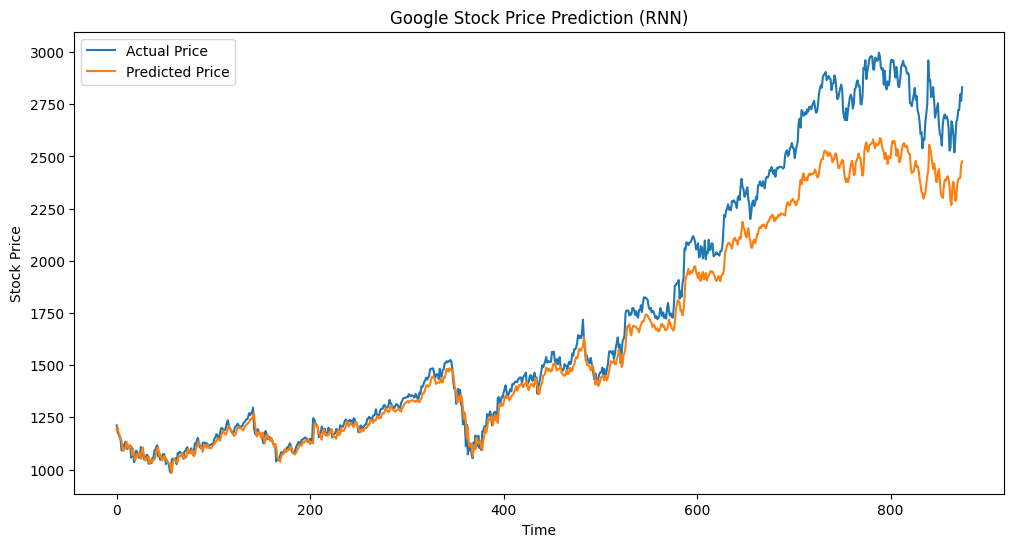

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Google Stock Price Prediction (RNN)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()